# Кунг фу графиков

Как сделать, чтобы графики и в браузере тоже были векторными

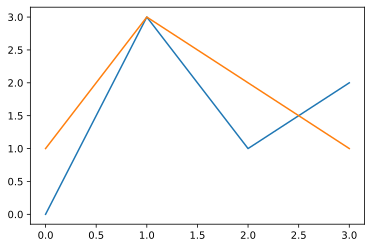

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

plt.plot([0, 1, 2, 3], [0, 3, 1, 2])
plt.plot([0, 1, 2, 3], [1, 3, 2, 1]);

Как менять стили графиков

''

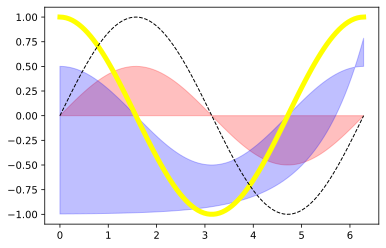

In [2]:
import numpy as np
import math

xs = np.linspace(0, 2*math.pi, 100)



plt.fill_between(
    xs,
    0, 1/2*np.sin(xs),
    color='red', alpha=0.25
)
plt.fill_between(
    xs,
    1/300*np.exp(xs) - 1, 1/2*np.cos(xs),
    color='blue', alpha=0.25
)
plt.plot(xs, np.vectorize(math.cos)(xs), color='yellow', linewidth=5)
plt.plot(xs, np.sin(xs), color='black', linewidth=1, linestyle='dashed')


;

Как сделать одинаковый масштаб по осям и добавить сетку и подписи

<ipython-input-3-bb0cdeb9ffe8>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


''

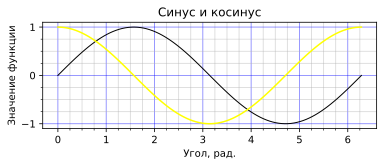

In [3]:
# Масштаб
plt.gca().set_aspect('equal')

# Графики
plt.plot(
    xs, np.sin(xs),
    color='black', linewidth=1)
plt.plot(
    xs, np.cos(xs),
    color='yellow')

# Сетка

ax = plt.axes()
ax.set_xticks(np.arange(0, 2*math.pi + 0.1, 1))
ax.set_yticks(np.arange(-1, 2, 1))
ax.set_xticks(np.arange(0,2*math.pi,0.25), minor=True)
ax.set_yticks(np.arange(-1,1,0.25), minor=True)
ax.grid(which='minor', alpha=0.5)
ax.grid(which='major', alpha=0.5, color='blue')

# Подписи
plt.xlabel('Угол, рад.')
plt.ylabel('Значение функции')
plt.title('Синус и косинус')
;

Как сделать у сетки логарифмический масштаб

<ipython-input-4-485e677555cd>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


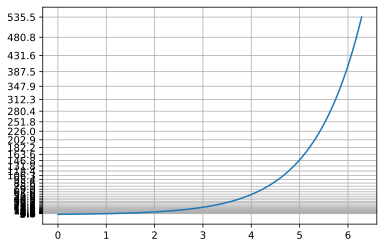

In [4]:
plt.plot(xs, np.exp(xs))

ax = plt.axes()
ax.set_yticks(np.logspace(1, 2*math.pi, base=math.e))
ax.grid(which='major')

Как сделать логарифмический масштаб у всего графика, и, чтобы не перепутать, где экспонента, а где прямая — вывести легенду

<ipython-input-5-a29560b9f09f>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


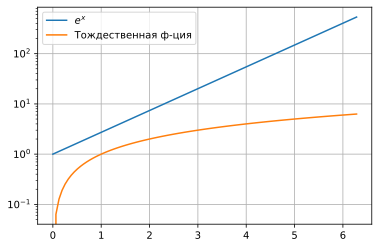

In [5]:
# Графики с легендой
plt.plot(xs, np.exp(xs), label="$e^x$")
plt.plot(xs, xs, label="Тождественная ф-ция")

ax = plt.axes()

# Логарифмический масштаб по оси Y
ax.set_yscale('log')
ax.grid()

# Легенда
ax.legend()

# Кунг фу поверхностей и кривых в 3D

Как рисовать поверхности

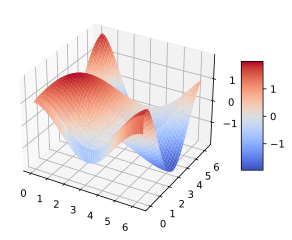

In [6]:
from matplotlib import cm
ys = xs

# X, Y — набор всех точек на плоскости в достаточно задумчивом
# формате. См. help(numpy.meshgrid)
X, Y = np.meshgrid(xs, ys)

# Z — набор значений функции в этих точках
Z = np.sin(np.sqrt(X*Y)) + np.cos(Y-X)

ax = plt.gca(projection='3d')
surf = ax.plot_surface(
    X, Y, Z,
    cmap=cm.coolwarm
)
plt.colorbar(surf, shrink=0.5, aspect=5)

Как рисовать кривые

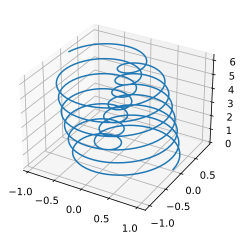

In [7]:
angles = np.arange(0, 20*math.pi, 0.1)
Z = angles / 10
X = np.cos(angles) * np.cos(angles / 2.9)
Y = np.sin(angles) * np.cos(angles / 2.9)

ax = plt.gca(projection='3d')
ax.plot(X, Y, Z)

Или попороще

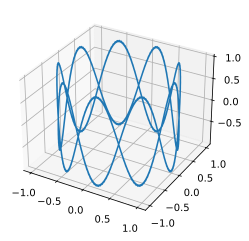

In [8]:
Z = np.cos(angles * 4.5)
X = np.cos(angles)
Y = np.sin(angles)

ax = plt.gca(projection='3d')
ax.plot(X, Y, Z)